In [ ]:
from google.colab import files
files.upload() # to upload the the kaggle.json

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"harshaprudhv004i","key":"85be41cb6ff7e082211234717c62be35"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions list

ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd       1799           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           200,000 Usd       1140           False  
https://www.kaggle.com/competitions/med-gemma-impact-challenge                      2026-02-24 23:59:00  Featured           100,000 Usd         95           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding-2                       2026-03-25 23:59:00  Featured            75,000 Usd        667           False  
https://ww

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 92% 747M/812M [00:04<00:01, 43.7MB/s]
100% 812M/812M [00:04<00:00, 203MB/s] 


In [ ]:
!ls

dogs-vs-cats.zip  sample_data


In [ ]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
!ls train | head

cat.0.jpg
cat.10000.jpg
cat.10001.jpg
cat.10002.jpg
cat.10003.jpg
cat.10004.jpg
cat.10005.jpg
cat.10006.jpg
cat.10007.jpg
cat.10008.jpg


In [ ]:
!mkdir train/cats train/dogs

In [ ]:
!mv train/cat*.jpg train/cats/
!mv train/dog*.jpg train/dogs/

In [ ]:
!ls train

cats  dogs


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:

train_ds = image_dataset_from_directory(
    "train",
    image_size=(256,256),
    batch_size=32,
    labels = 'inferred',
    label_mode='int',
    validation_split=0.2,   # 80% train
    subset="training",
    seed = 42
)


Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [ ]:
val_ds = image_dataset_from_directory(
    "train",
    image_size=(256,256),
    batch_size=32,
    labels = 'inferred',
    label_mode='int',
    validation_split=0.2,   # same split
    subset="validation",
    seed=42
)


Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
!unzip test1

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
!ls test1 | head

10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg


#CNN Model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from keras import Sequential

In [ ]:
#data augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [ ]:
model = Sequential()

# -------- Data Augmentation + Normalization --------
model.add(RandomFlip("horizontal", input_shape=(256,256,3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))
model.add(Rescaling(1./255))

# -------- Conv Block 1 --------
model.add(Conv2D(32, (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.25))

# -------- Conv Block 2 --------
model.add(Conv2D(64, (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.25))

# -------- Conv Block 3 --------
model.add(Conv2D(128, (3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2), strides=2))
model.add(Dropout(0.25))

# -------- Fully Connected --------
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# -------- Output Layer --------
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,848,705 (56.64 MB)

 Trainable params: 14,848,001 (56.64 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.5815 - loss: 0.7356 - val_accuracy: 0.6898 - val_loss: 0.5872
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 124s 199ms/step - accuracy: 0.6595 - loss: 0.6102 - val_accuracy: 0.7298 - val_loss: 0.5547
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.7101 - loss: 0.5589 - val_accuracy: 0.5608 - val_loss: 0.7948
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.7426 - loss: 0.5237 - val_accuracy: 0.6768 - val_loss: 0.6127
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 199ms/step - accuracy: 0.7704 - loss: 0.4795 - val_accuracy: 0.7934 - val_loss: 0.4418
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 200ms/step - accuracy: 0.7903 - loss: 0.4483 - val_accuracy: 0.7276 - val_loss: 0.5292
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 198ms/step - accuracy: 0.8055 - loss: 0.4242 - val_accuracy: 0.7188 - val_loss: 0.5611
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 127s 204ms/step - accuracy: 0.8218 -

In [ ]:
tr_loss,tr_acc = model.evaluate(train_ds)
print("Training Acc",tr_acc)
tr_acc =tr_acc
te_loss,te_acc = model.evaluate(val_ds)
print("Testing Acc",te_acc)
te_cc = te_acc

625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 45ms/step - accuracy: 0.8296 - loss: 0.3788
Training Acc 0.8327500224113464
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.8205 - loss: 0.4124
Testing Acc 0.8227999806404114


In [ ]:
import matplotlib.pyplot as plt

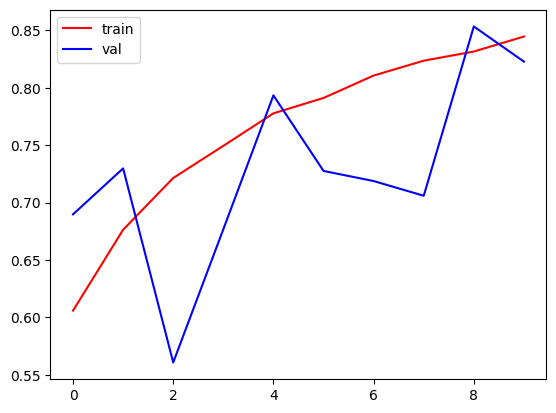

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='val')
plt.legend()

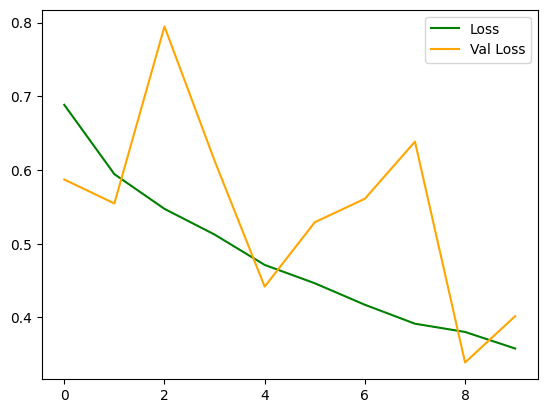

In [ ]:
plt.plot(history.history['loss'],color='green',label='Loss')
plt.plot(history.history['val_loss'],color='orange',label='Val Loss')
plt.legend()

#Prediction

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

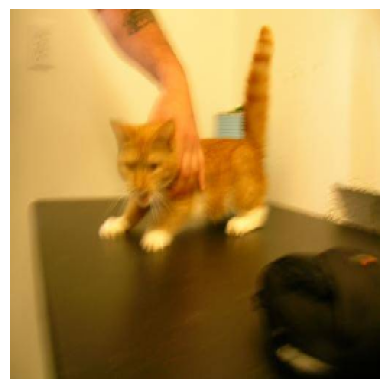

In [ ]:
img = image.load_img("/content/train/cats/cat.0.jpg", target_size=(256,256))
img = image.img_to_array(img)

plt.imshow(img.astype("uint8"))
plt.axis('off')


In [ ]:
img_array = img/ 255.0

In [ ]:
img_array.shape

(256, 256, 3)

In [ ]:
img = img_array.reshape(1,256,256,3)

In [ ]:
pred = model.predict(img)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[0.4999928]]


In [ ]:
if pred[-1]>0.5:
  print("Dog")
else:
  print("Cat")

Cat
